# 1 Import and Understand the data

In [1]:
# A. Import ‘signal-data.csv’ as DataFrame

import pandas as pd

Signaldt = pd.read_csv('signal-data.csv')

In [3]:
#B. Print 5 point summary and share at least 2 observations

Signaldt.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# 2 Data cleansing

In [8]:
#A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

threshold = len(Signaldt) * 0.20

for col in Signaldt.columns:
    if Signaldt[col].isnull().sum() > threshold:
        Signaldt.drop(col, axis=1, inplace=True)
    elif Signaldt[col].dtype in ['int64', 'float64']:
        Signaldt[col].fillna(Signaldt[col].mean(), inplace=True)


In [9]:
#B. Identify and drop the features which are having same value for all the rows

for col in Signaldt.columns:
    if Signaldt[col].nunique() == 1:
        Signaldt.drop(col, axis=1, inplace=True)


In [15]:
#C. Drop other features if required using relevant functional knowledge. Clearly justify the same

Signaldt.drop('Time', axis=1, inplace=True) #removed time data as it didn't seem relevant

In [19]:
#D. Check for multi-collinearity in the data and take necessary action

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = Signaldt.select_dtypes(include=[float, int])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
Signaldt.drop(columns=high_vif_features, inplace=True)


C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


       feature            VIF
0            0   24224.261955
1            1    9573.505757
2            2  154511.611950
3            3     127.670372
4            4   42515.862131
..         ...            ...
438        586       9.795320
439        587     131.328484
440        588     125.402951
441        589       5.847050
442  Pass/Fail       6.802800

[443 rows x 2 columns]


In [35]:
#E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions

bins = [-float('inf'), 0, float('inf')]
labels = ['Pass', 'Fail']
Signaldt['PassFail_Bucket'] = pd.cut(Signaldt['Pass/Fail'], bins=bins, labels=labels)


# 3. Data Analysis and Visualisation

Descriptive Statistics:
                  9           10            24           41           59  \
count  1567.000000  1567.000000   1567.000000  1567.000000  1567.000000   
mean     -0.000841     0.000146   -298.598136     3.353066     2.960241   
std       0.015107     0.009296   2900.835956     2.342268     9.510891   
min      -0.053400    -0.034900 -14804.500000    -0.075900   -28.988200   
25%      -0.010800    -0.005600  -1474.375000     2.699000    -1.855450   
50%      -0.001300     0.000400    -80.500000     3.080000     0.973600   
75%       0.008400     0.005900   1376.250000     3.515000     4.337700   
max       0.074900     0.053000  14106.000000    37.880000   168.145500   

                75           76           77           78           79  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean     -0.006903    -0.029390    -0.007041    -0.013643     0.003458  ...   
std       0.022121     0.032948     0.031127     0.047504     

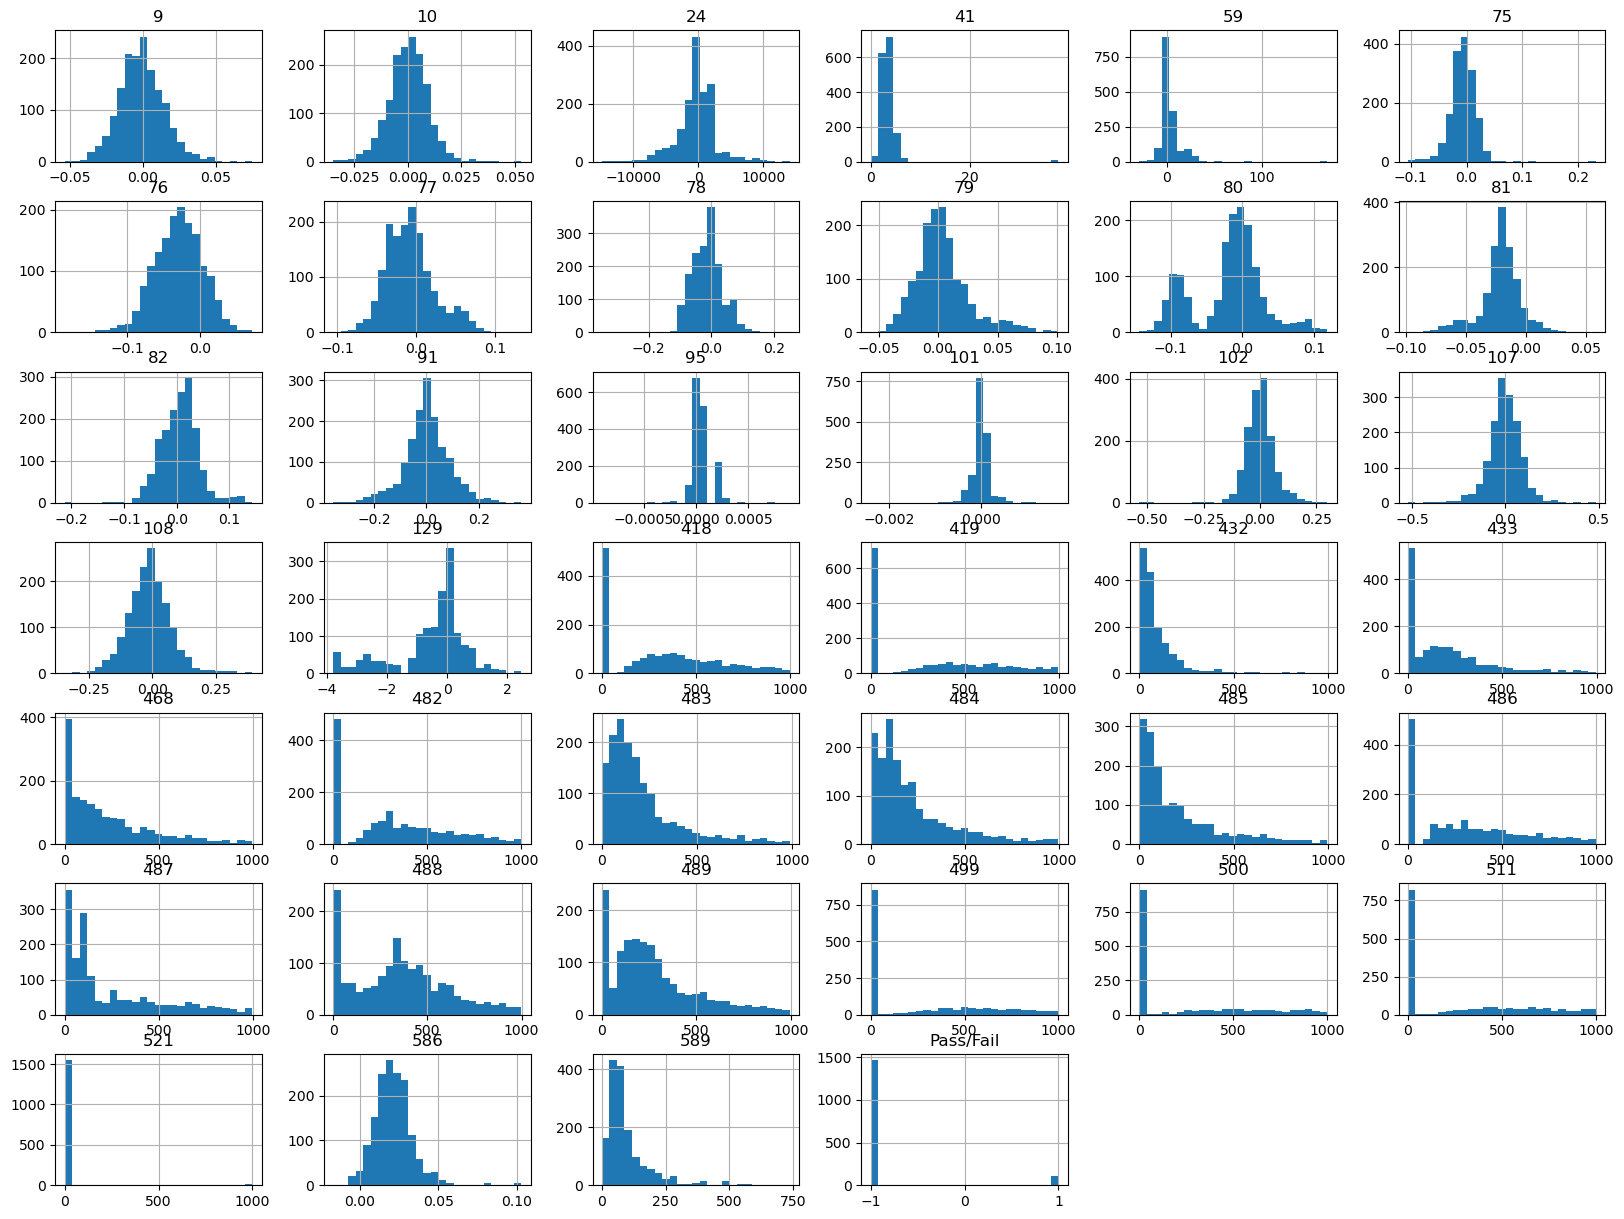

Box Plots for Numerical Variables:


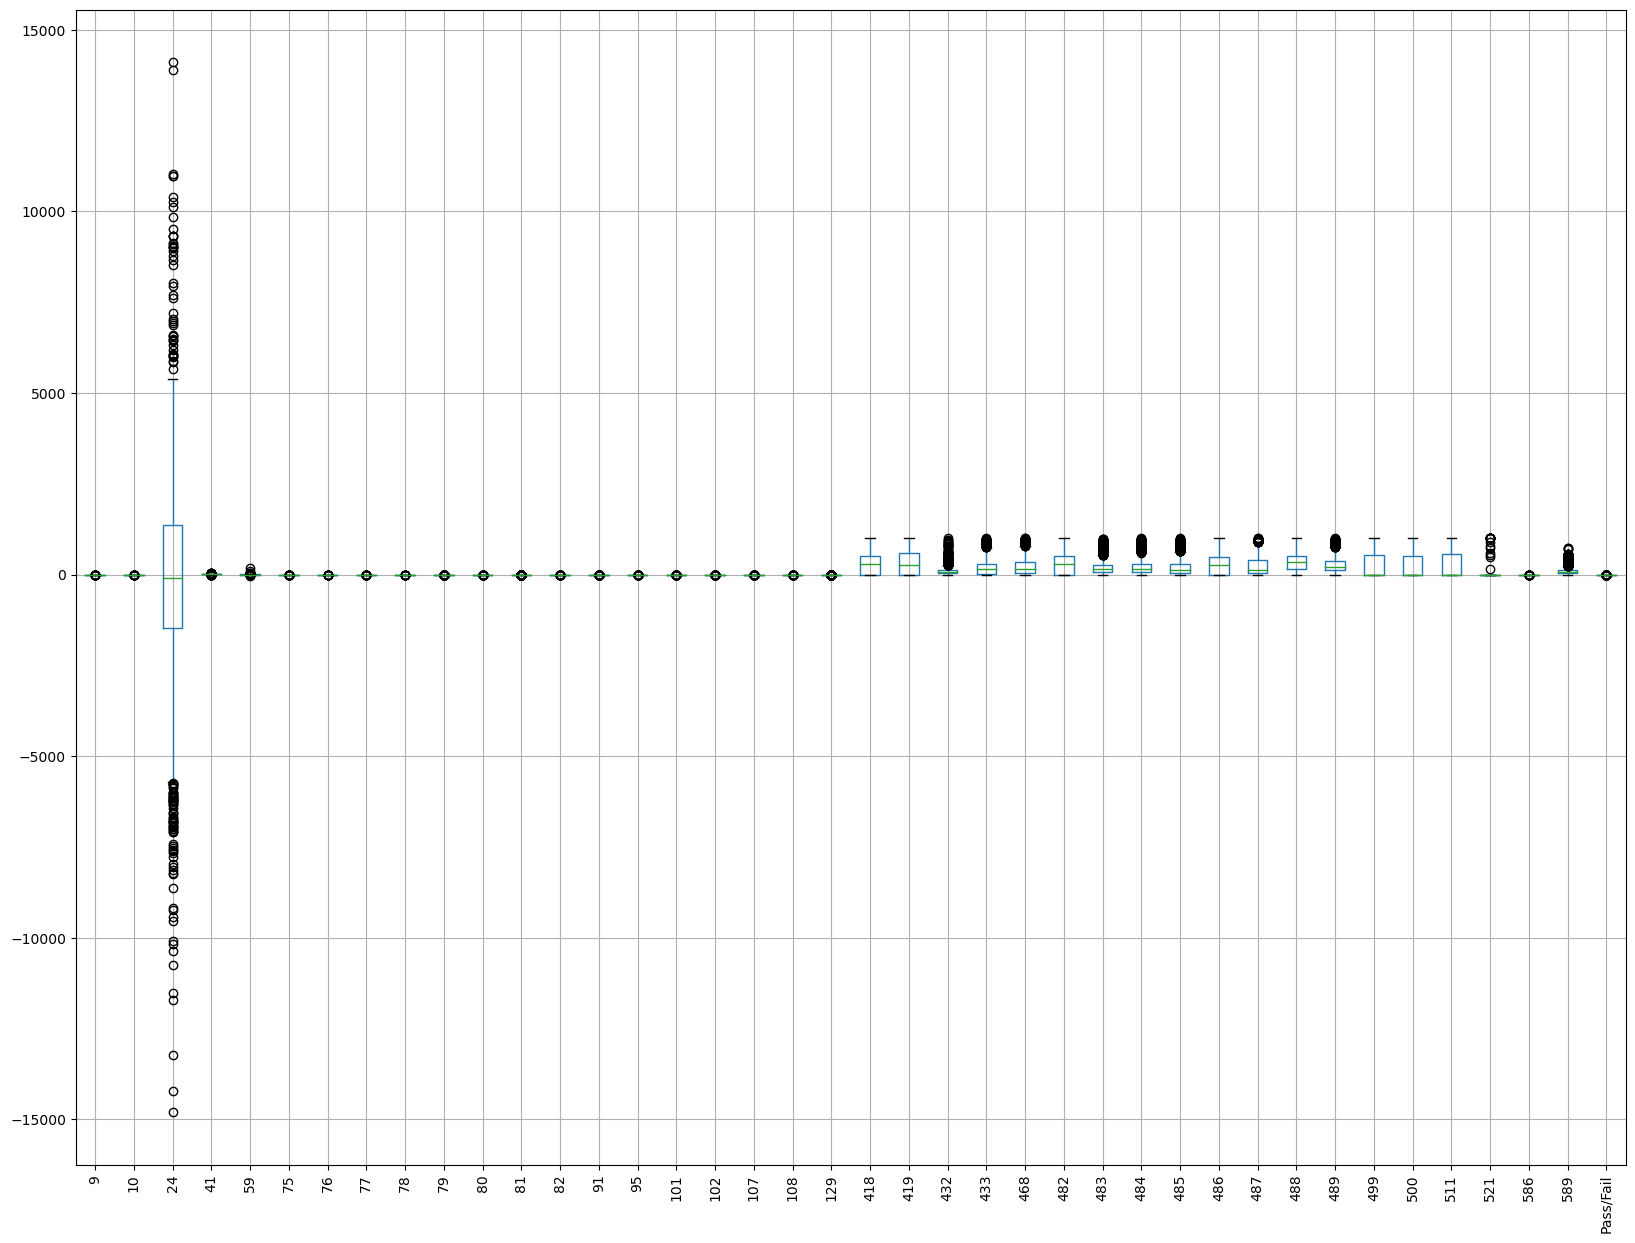

Bar Charts for Categorical Variables:
Value Counts for Discrete Numeric Variables:
-1    1463
 1     104
Name: Pass/Fail, dtype: int64




In [41]:
#A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

import matplotlib.pyplot as plt

descriptive_stats = Signaldt.describe()
print("Descriptive Statistics:\n", descriptive_stats)
print('\n')

print("Frequency Distribution for Categorical Variables:")
for col in Signaldt.select_dtypes(include=['object']):
    print(Signaldt[col].value_counts())
    print('\n')


print("Histograms for Numerical Variables:")
Signaldt.hist(bins=25, figsize=(20,15))
plt.show()

print("Box Plots for Numerical Variables:")
Signaldt.boxplot(figsize=(20,15))
plt.xticks(rotation=90)
plt.show()

print("Bar Charts for Categorical Variables:")
for col in Signaldt.select_dtypes(include=['object']):
    Signaldt[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

print("Value Counts for Discrete Numeric Variables:")
for col in Signaldt.select_dtypes(include=['int']):
    print(Signaldt[col].value_counts())
    print('\n')

C:\Users\Rigved Hebbalkar\AppData\Local\Temp\ipykernel_22136\2056973717.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sample_data.corr()


Correlation Matrix:
                   9        10        24        41        59        75  \
9          1.000000 -0.147447 -0.031200 -0.119864  0.069573 -0.047793   
10        -0.147447  1.000000  0.026004  0.021193  0.154118 -0.095313   
24        -0.031200  0.026004  1.000000  0.045562  0.091150  0.062849   
41        -0.119864  0.021193  0.045562  1.000000  0.025781 -0.003269   
59         0.069573  0.154118  0.091150  0.025781  1.000000 -0.165222   
75        -0.047793 -0.095313  0.062849 -0.003269 -0.165222  1.000000   
76         0.214204  0.030954  0.066355 -0.140995 -0.172487  0.078042   
77        -0.051486  0.108194  0.014776  0.020186 -0.096132  0.146475   
78         0.001934 -0.084889 -0.036578 -0.149537 -0.232933  0.151302   
79         0.037057  0.088619  0.001293 -0.022223  0.430726 -0.314864   
80        -0.101486  0.254124 -0.070619 -0.139903 -0.176462 -0.118651   
81        -0.014223 -0.024905 -0.010295  0.080645 -0.011220  0.061710   
82         0.015714  0.002119 

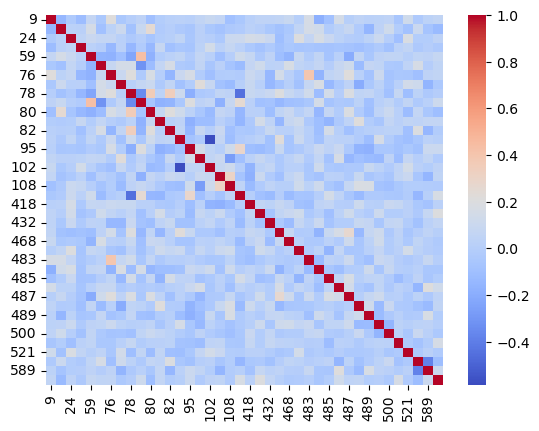

Parallel Coordinates:


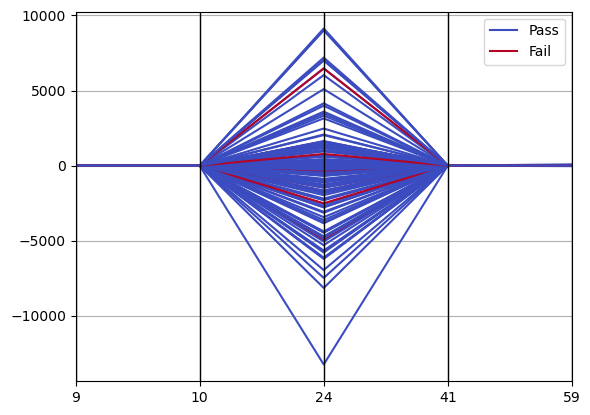

Pairplot:


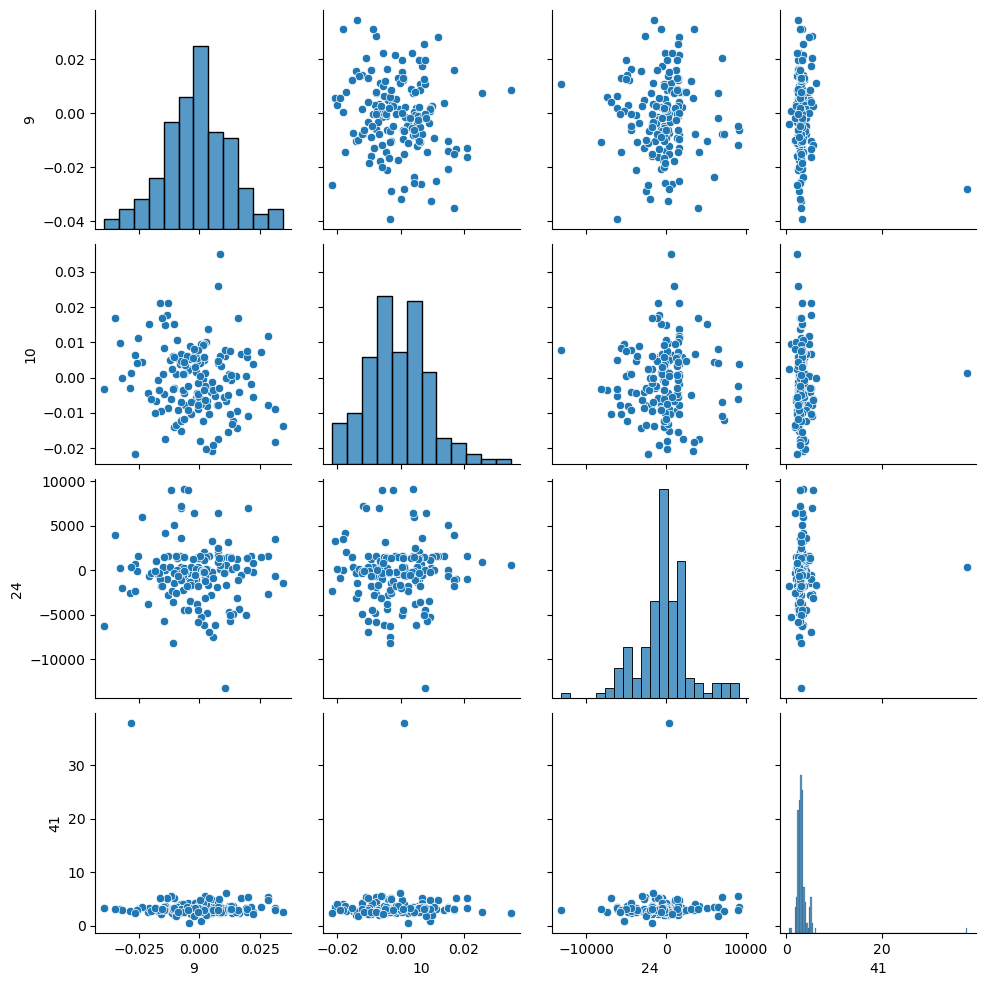

In [49]:
#B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

import seaborn as sns
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Bivariate Analysis
# 1. Correlation Matrix of a sample
sample_data = Signaldt.sample(frac=0.1, random_state=1)  # Adjust frac as necessary
correlation_matrix = sample_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 2. Heatmap of Correlation Matrix
print("Heatmap:")
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # set annot=True for a smaller dataset
plt.show()

# Multivariate Analysis
# 1. Parallel Coordinates - For a selection of numerical columns
selected_columns = sample_data.select_dtypes(include=[np.number]).columns.tolist()[:5]  # Adjust number of columns as necessary
parallel_data = sample_data[selected_columns + ['PassFail_Bucket']]
print("Parallel Coordinates:")
parallel_coordinates(parallel_data, 'PassFail_Bucket', colormap='coolwarm')
plt.show()

# 3. Pairplot - For a selection of numerical columns
selected_columns = sample_data.select_dtypes(include=[np.number]).columns.tolist()[:4]  # Adjust number of columns as necessary
print("Pairplot:")
sns.pairplot(sample_data[selected_columns])
plt.show()



# 4. Data pre-processing

In [57]:
#A. Segregate predictors vs target attributes

predictors = Signaldt.drop(columns=['Pass/Fail', 'PassFail_Bucket'])
targets = Signaldt[['Pass/Fail', 'PassFail_Bucket']]


In [59]:
#B. Check for target balancing and fix it if found imbalanced

print(targets['Pass/Fail'].value_counts())

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
predictors_balanced, target_balanced = smote.fit_resample(predictors, targets['Pass/Fail'])

-1    1463
 1     104
Name: Pass/Fail, dtype: int64


In [60]:
#C. Perform train-test split and standardise the data or vice versa if required

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(predictors_balanced, target_balanced, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
#D. Check if the train and test data have similar statistical characteristics when compared with original data

print("Original Data:\n", predictors.describe())
print("\nTrain Data:\n", X_train.describe())
print("\nTest Data:\n", X_test.describe())


Original Data:
                  9           10            24           41           59  \
count  1567.000000  1567.000000   1567.000000  1567.000000  1567.000000   
mean     -0.000841     0.000146   -298.598136     3.353066     2.960241   
std       0.015107     0.009296   2900.835956     2.342268     9.510891   
min      -0.053400    -0.034900 -14804.500000    -0.075900   -28.988200   
25%      -0.010800    -0.005600  -1474.375000     2.699000    -1.855450   
50%      -0.001300     0.000400    -80.500000     3.080000     0.973600   
75%       0.008400     0.005900   1376.250000     3.515000     4.337700   
max       0.074900     0.053000  14106.000000    37.880000   168.145500   

                75           76           77           78           79  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean     -0.006903    -0.029390    -0.007041    -0.013643     0.003458  ...   
std       0.022121     0.032948     0.031127     0.047504     0.022902 

# 5. Model training, testing and tuning

In [62]:
#A. Use any Supervised Learning technique to train a model.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=1)

In [63]:
#B. Use cross validation techniques

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)

from scipy.stats import uniform
param_distributions = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
random_search = RandomizedSearchCV(model, param_distributions, cv=5, verbose=1, n_iter=100, random_state=1)
random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001175B116110>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=1, verbose=1)

In [64]:
#D. Use any other technique/method which can enhance the model performance

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model.fit(X_train_pca, y_train)


LogisticRegression(random_state=1)

In [65]:
#E. Display and explain the classification report in detail

from sklearn.metrics import classification_report

# E. Classification Report
y_pred = model.predict(X_test_pca)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

          -1       0.75      0.70      0.72       300
           1       0.70      0.75      0.73       286

    accuracy                           0.72       586
   macro avg       0.72      0.72      0.72       586
weighted avg       0.73      0.72      0.72       586



In [66]:
#F. Apply the above steps for all possible models that you have learnt so far

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

models = {
    "SVM": {
        "model": SVC(),
        "params": {
            'C': [0.1, 1, 10],
            'gamma': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    "Gradient Boost": {
        "model": GradientBoostingClassifier(),
        "params": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
            'max_depth': [3, 5, 10]
        }
    }
}

for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"Best Parameters for {model_name}:\n", grid_search.best_params_)
    print("-" * 50)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Classification Report for SVM:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       286

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

Best Parameters for SVM:
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
--------------------------------------------------
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Classification Report for KNN:
               precision    recall  f1-score   support

          -1       1.00      0.63      0.77       300
           1       0.72      1.00      0.84       286

    accuracy                           0.81       586
   macro avg       0.86      0.81      0.80       586
weighted avg       0.86      0.81      0.80       586

Best Parameters for KNN:
 {'algorithm': '

# 6. Post Training and Conclusion

In [85]:
#C Pickle the selected model for future use

import pickle

filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

